<a href="https://colab.research.google.com/github/JiscDACT/PositivelySkewed/blob/main/Stats102/Stats_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stats 102**

This tutorial will build on the statistics already learnt in the previous module including the following:

* Sampling
* Normal distribution
* Correlation
* Confidence intervals
* Hypothesis tests

We will be using the following libraries: 
```
- seaborn
- numpy
- pandas
- matplotlib
- scipy
- ipywidgets
```

## **Importing Libraries**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm
import scipy.stats as stats
from ipywidgets import interactive 

## **Sampling**

**The most common types of sampling**
* Random sampling: participants are chosen at random from the population. ​

* Stratified sampling: The population is divided into groups by certain characteristics, and a set number of participants are randomly sampled from the population groups.​

* Convenience sampling: participants are those who are available at the time of research.

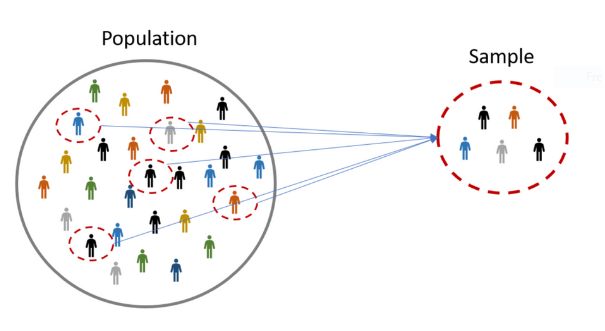

Sampling is a common technique used when obtaining data on the whole population is unreasonable due to size or impossible. Sampling allows us to draw conclusions of the overall population based on statistics from the sample, which we saw is representative of the population.

In this section we will explore how to perform random sampling using Python and introduce the concept of "seeds". Let's start with some data that will simulate dice rolls. Run the code cell below.

In [ ]:
faces = np.arange(1, 7)
die = pd.DataFrame({'Face': faces}) #Creates a dataframe from 1-6 to represent that faces of each dice
die.style.hide_index() #This function is useful when we want to hide the index of a table

Face
1
2
3
4
5
6


Using the sample function we can create a sample from the die table that will simulate 2 dice rolls

In [ ]:
die.sample(2)

,Face
3,4
2,3


Notice if you rerun the code above several time we get different results. This can cause issues if you want your analysis to be repeatable. This introduces the concept of seeds or random states. A seed is a starting point in generating random numbers.

### Exercise 1
Using the die dataset, sample 2 dice rolls as above but include a seed. The documentation for the sample function may be helpful https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [ ]:
# insert code here

In [ ]:
# @markdown Click here for the answer
die.sample(2, random_state=300)

Face
4
1


### Exercise 2
Now adapt the code to select multiple times from the sample of dice faces. Adapt the above code to take a random sample of 30 dice rolls.

In [ ]:
# insert full code below


In [ ]:
# @markdown Click here for the answer
die.sample(30,random_state=300, replace=True)

,Face
1,2
1,2
5,6
2,3
2,3
1,2
5,6
3,4
1,2
1,2


### Weighted samples

What if the dice is biased with a weighted face so that the probability of rolling a number is not evenly distributed.

In [ ]:
weights = [0.1,0.2,0.2,0.3,0.1,0.1]

In [ ]:
die.sample(30,random_state=300, replace=True, weights=weights)

,Face
2,3
1,2
2,3
1,2
1,2
3,4
4,5
2,3
0,1
3,4


## **Normal Distribution**

The bell-shaped curve in the middle of this image is showing a perfect normal distribution of data. This is when the mean = the median = the mode. This plot is also symmetrical about the mean. ​

It is unlikely that data in the real world would perfectly fit this distribution. The negatively and positively skewed examples show how the distribution can change when the averages are not equal, this is called skew and can occur at varying degrees. ​

The tails, do not touch the x-axis at any point as the tails go on to infinity. 

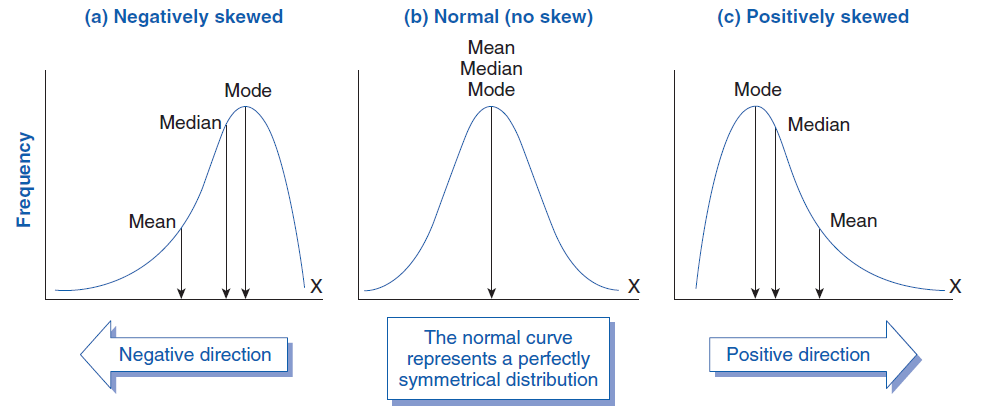

A Histogram can be used to visually check if data is normally distributed.

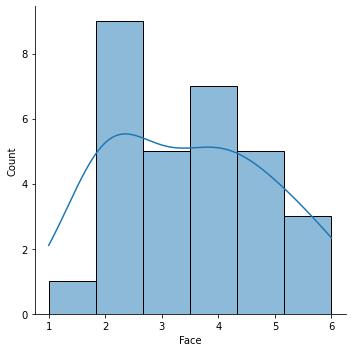

In [ ]:
onedice = die.sample(30,random_state=300,replace=True)
#create normal distribution curve
sns.displot(onedice['Face'], kde=True);

This data doesn't look very normally distributed, when comparing the line to the bar chart distribution.

Certain statistical tests require a normal distribution as an assumption. These tests are called parametric tests. The central limit theorem suggests that any dataset with more than 30 data points, can be approximated to a normal distribution. ​
​

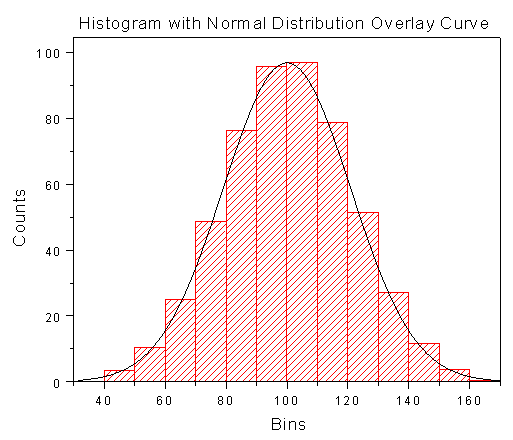

### Exercise 3

Consider the dice example again, what if we sum the result of two dice rolls and repeated 30 times?

In [ ]:
twodice = die.sample(30,random_state=300, replace=True).reset_index(drop=True)
twodice['Face2'] = die.sample(30,random_state=50, replace=True).reset_index(drop=True)

In [ ]:
#insert code here

In [ ]:
#@markdown Click here to reveal the answer
twodice['Sum']=twodice['Face']+twodice['Face2']
    # the trick here is to add 2 sample together that have different seeds/random_states
twodice.style.hide_index()

Face,Face2,Sum
2,1,3
2,1,3
6,4,10
3,6,9
3,2,5
2,5,7
6,6,12
4,6,10
2,6,8
2,3,5


In [ ]:
#now generate the plot to test for normality


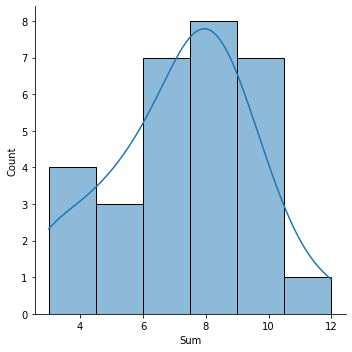

In [ ]:
#@markdown Click here to reveal the answer
sns.displot(twodice['Sum'], kde=True);

### Standard deviation with normal distribtuions

Standard deviations are relevant to the normal distribution as it determines the spread of the data, and the size of the curve. As noted on the graph, +/- 1 standard dev encapusaltes 68.3% of the data, =/- 2 standard devs encapsulates 95.5% and +/- 3 standard devs encapsulates nearly all the data at 99.7%. The larger the standard deviation, the more stretched the curve would be along the x-axis, the smaller the standard deviation, the shorter the curve. ​

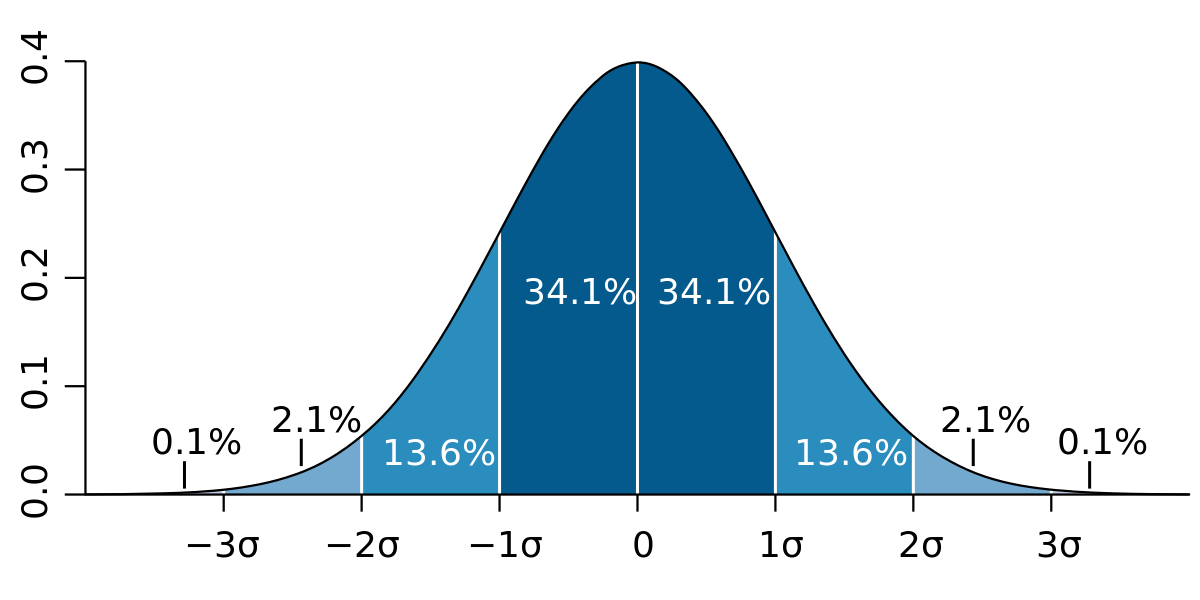

### Central Limit Theorem

Is the distribution normal? What if we increase the sample size? Use the slider below to explore the distribution of the data as we take more samples. Does the central limit theorem hold?

In [ ]:
#@title
get_ipython().run_line_magic('matplotlib', 'inline')

# Define initial parameters
init_SampleSize = 30
twodice = die.sample(init_SampleSize,random_state=300, replace=True).reset_index(drop=True)
twodice['Face2'] = die.sample(init_SampleSize,random_state=50, replace=True).reset_index(drop=True)
twodice['Sum']=twodice['Face']+twodice['Face2']

# function to update size of data
def f(SampleSize):
  twodice = die.sample(SampleSize,random_state=300, replace=True).reset_index(drop=True)
  twodice['Face2'] = die.sample(SampleSize,random_state=50, replace=True).reset_index(drop=True)
  twodice['Sum']=twodice['Face']+twodice['Face2']
  return twodice
    
def sir_interactive_func(SampleSize):
      
    # Plot the histogram.
    Solution = (f(SampleSize))
    plt.hist(Solution['Sum'],bins=10, density=True, alpha=0.6, color='b')
      
    mu, std = norm.fit(Solution['Sum']) 

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
      
    plt.plot(x, p)

    plt.title("Central Limit Theorem")
    plt.xlabel("Sum of 2 random dices rolls")
    plt.ylabel("Count")
    

interactive_plot = interactive(sir_interactive_func, SampleSize=(30,200,10))
interactive_plot

interactive(children=(IntSlider(value=110, description='SampleSize', max=200, min=30, step=10), Output()), _do…

### Exercise 4

Skewed distributions are still normal distributions but is asymmetrical. Using the *die* dataframe contraining weights construct a normal distribution curve for the data.

In [ ]:
weights = [0.1,0.1,0.1,0.3,0.3,0.1]
die = pd.DataFrame({'Face': faces}) #Creates a dataframe from 1-6 to represent that faces of each dice
weightdice = die.sample(300, weights=weights, random_state=300, replace=True).reset_index(drop=True)

In [ ]:
#create the skewed normal distribution plot below


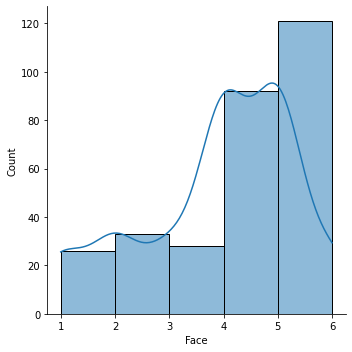

In [ ]:
#@markdown Click here to reveal the answer
sns.displot(weightdice['Face'], kde=True, bins=[1, 2, 3, 4, 5, 6]);

## **Correlations**

Describes a relationship between two variables​

Important: Correlation doesn’t imply causation!

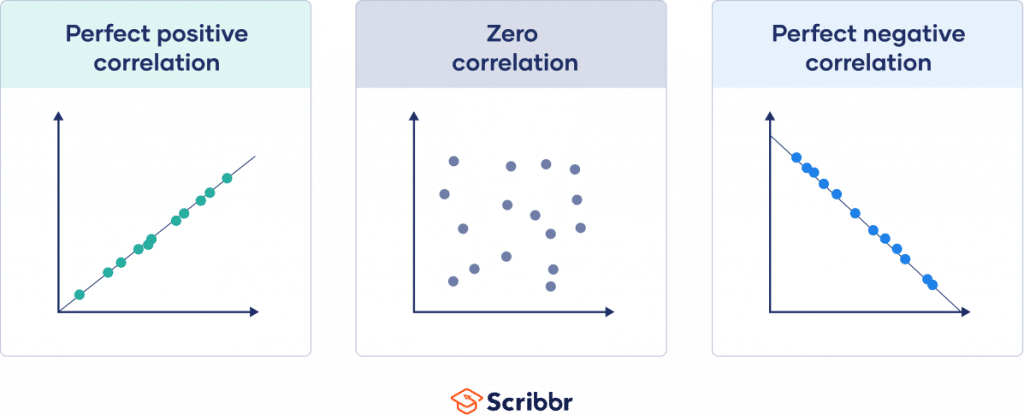

The correlation coefficient (r) quantifies the strength of the relationship and ranges from -1 to +1​

The closer r is to zero, the weaker the relationship​

Positive r values indicate a positive correlation​

Negative r values indicate a negative correlation​

Correlations can also be tested for statistical significance​

### Scatterplot

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] =  pd.DataFrame(data.target) #  as values 0,1,2
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Correlation is a great way to explore the relationships between columns. 

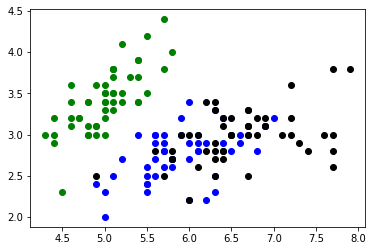

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=1)
axes.scatter(x=df[df['Species']==0]['sepal length (cm)'], y=df[df['Species']==0]['sepal width (cm)'], color='green')
axes.scatter(x=df[df['Species']==1]['sepal length (cm)'], y=df[df['Species']==1]['sepal width (cm)'], color='blue')
axes.scatter(x=df[df['Species']==2]['sepal length (cm)'], y=df[df['Species']==2]['sepal width (cm)'], color='black')
plt.show();

### Heatmap

A heatmap is a really great way to visualize correlation. We can quickly spot the highest correlations at a glance. In particular with the heatmap below we are most interested in the highest correlations with the Species column. Values higher than 0.7 are considered strong positive correlations.

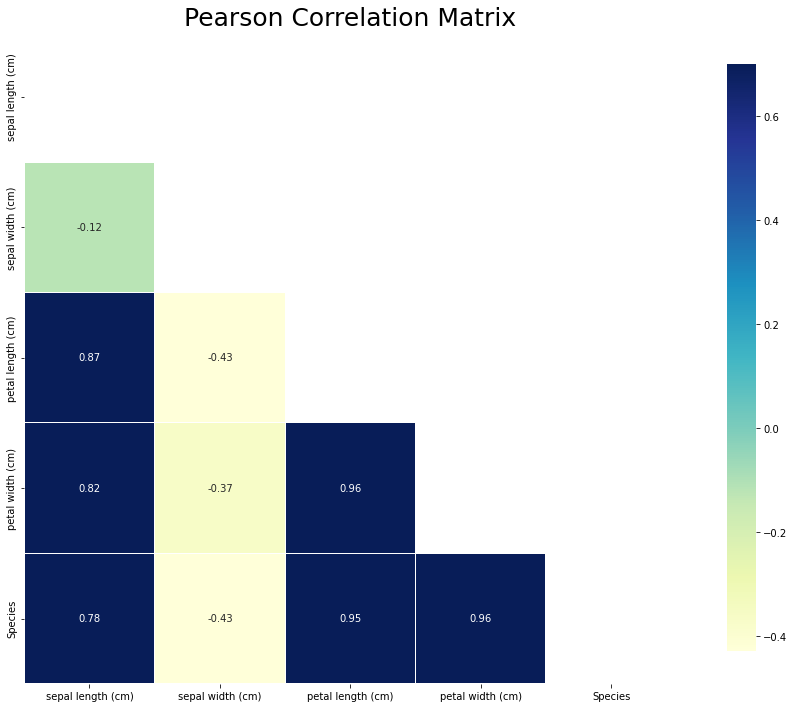

In [ ]:
mask = np.zeros_like(df.corr(method='pearson'), dtype=bool)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(18, 12))

plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(df.corr(method='pearson'),linewidths=0.25,vmax=0.7,square=True,cmap="YlGnBu",
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});

### Exercise 5

Calculate the spearman correlation coefficients for the data frame

In [ ]:
# enter code here

In [ ]:
#@markdown Click here for answers
df.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
Species,0.798078,-0.440290,0.935431,0.938179,1.000000


## **Confidence Intervals**


A Confidence Interval is a range of values we are fairly sure our true value lies in.​

Confidence intervals are based off standard normal distribution. Due to this we calculate 2 values: the upper limit and the lower limit.​

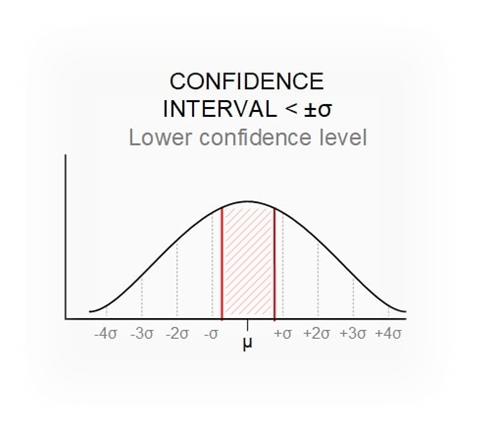

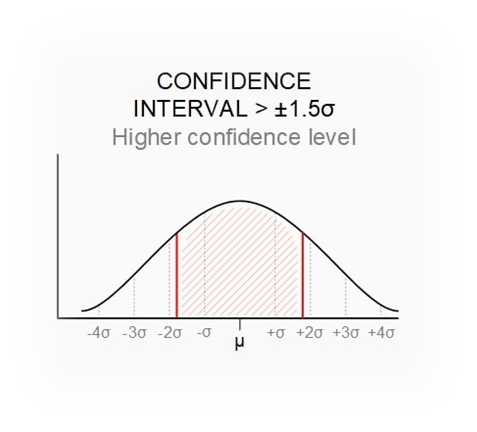

The figures above show that the confidence interval ranges (between the red lines) are dependent on the confidence level selected. A higher confidence level results in a wider confidence interval range.

### Z-Value

This converts the % confidence interval into the number of standard deviations from the mean.​

We use a statistical table to get this value.​ https://www.ztable.net/

The most common confidence interval to use is 95%. This has a z-score of 1.96 (try and find this value in the table)

### Formula

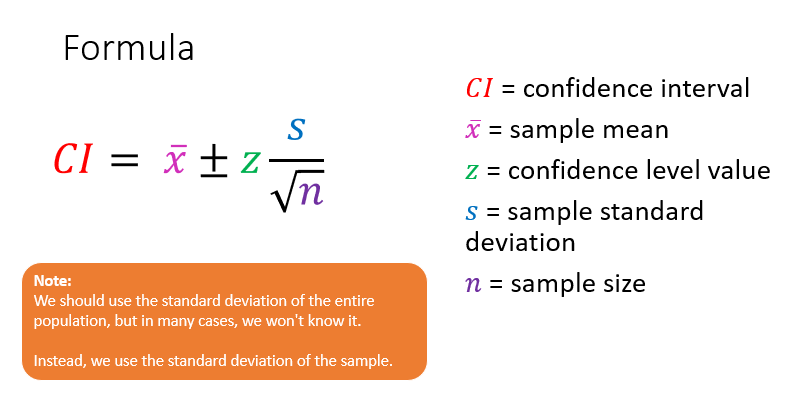

The most common confidence interval to use is 95%. Which above we saw corresponded to a z-score of 1.96.

There are hundreds of apples on the trees in an orchard, so you randomly choose just 46 apples to weigh and get: Mean, 𝑥= 86 grams Standard deviation, s = 26.2 grams We want to calculate a 95% confidence interval of this data.

In [ ]:
#Number of observations
n = 46
#Mean 
x = 86 
#Standard deviation 
s = 6.2
#Confidence level
z = 0.95

confidence_interval = stats.t.interval(z, n-1, x, s/np.sqrt(n))
print(confidence_interval)

(84.15882727366028, 87.84117272633972)


Therefore the true mean weight of ALL the apples in the orchard is likely to be between 84.15g and 87.84g.

### Exercise 6

Again in the real world we are assuming we are working with sample data

In [ ]:
confidence_level = 0.95
degrees_freedom = iris['sepal length (cm)'].size - 1
sample_mean = np.mean(iris['sepal length (cm)'])
sample_standard_error = stats.sem(iris['sepal length (cm)'])

Repeat the example in the presentation but only looking at Species 1 and changing the significance level to 90%

In [ ]:
#Enter the code below


In [ ]:
#@markdown Click here for the answers
confidence_level = 0.90
degrees_freedom = iris[iris['Species']==1]['sepal length (cm)'].size - 1
sample_mean = np.mean(iris[iris['Species']==1]['sepal length (cm)'])
sample_standard_error = stats.sem(iris[iris['Species']==1]['sepal length (cm)'])

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(5.813615768931224, 6.058384231068776)

## **Hypothesis Testing**

Usually, the population standard derviations is unknown so you would need to use a T Test with a T Statistic instead of a Z score Another reason to use T test is when you have a small sample size (<30)

In the real world we usually never know the population standard deviation so we will focus on samples and thus the T-test.

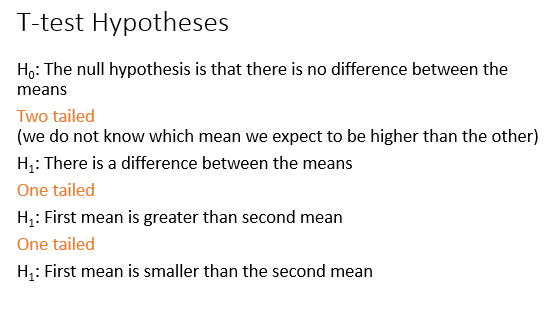

### Two independent sample T-test

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['Species'] =  pd.Series(data.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Test whether there is a difference in sepal length between 2 groups e.g. 2 species of plant. Can do one-tailed e.g. is a value lower or higher for one group or two-tailed is there a difference between the 2 groups

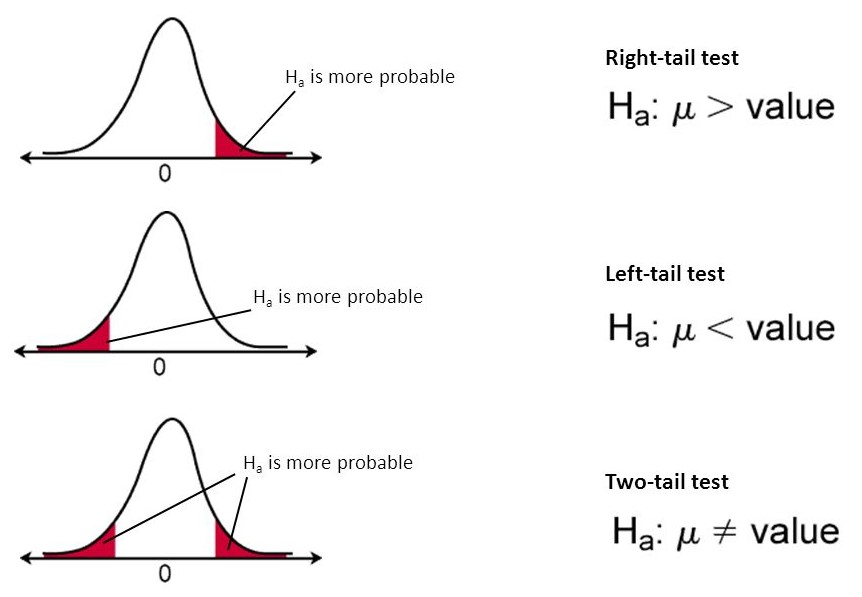

In [ ]:
def t_test(x,y,alternative='both-sided'):
          _, double_p = stats.ttest_ind(x,y,equal_var = False)
          if alternative == 'both-sided':
              pval = double_p
          elif alternative == 'greater':
              if np.mean(x) > np.mean(y):
                  pval = double_p/2.
              else:
                  pval = 1.0 - double_p/2.
          elif alternative == 'less':
              if np.mean(x) < np.mean(y):
                  pval = double_p/2.
              else:
                  pval = 1.0 - double_p/2.
          return pval

Consider the following null hypothesis
> H0: Species 0 has a greated speal length than Species 1

In [ ]:
x= iris[iris['Species']==0]['sepal length (cm)']
y= iris[iris['Species']==1]['sepal length (cm)']
t_test(x,y,alternative='greater')

A p-value of less than 0.05 represents a significant test at the 95% confidence level. Thus, we reject the null hypothesis that Species (0) sepal length is the same Species (1) sepal length at the 95% confidence level

### Exercise 7

Try the next example for the following null hypothesis
> H0: Species 0 has a lower sepal length than Species 1
Is the test significant?

In [ ]:
#insert code below


In [ ]:
#@markdown Click here for answers
t_test(x,y,alternative='less')
#the test is significant

1.873371306991921e-17

### One sample T-test

Null hypothesis is H0: Species 1 has a population mean of 5.9cm

In [ ]:
x = iris[iris['Species']==1]['sepal length (cm)']
test_mean = 5.9
stats.ttest_1samp(x,test_mean) #half the p-value if doing a one-sided t-test

Thus, we cannot reject the null hypothesis that the mean sepal length for Species 1 is 5.9cm

### Exercise 8

Compare this test to the confidence interval from above if you enter a test mean outside this confidence interval range the test will come back significant. Can you select a test mean that would result in a significant test at the 95% confidence level.

In [ ]:
# enter code here


In [ ]:
#@markdown Click here for answers
test_mean = 6.1 # any value outside the confidence range e.g. below 5.8 or above 6.1
stats.ttest_1samp(x, test_mean) #half the p-value if doing one-sided test

Ttest_1sampResult(statistic=-2.246648476464449, pvalue=0.029201842612217952)

# **Feedback**

Please complete the below anonymous feedback.

In [1]:
#@title
%%html

<iframe src="https://docs.google.com/forms/d/e/1FAIpQLSdfjiJZkPNMUrMYVhGyYy7C3pHfNIBwI0zqbaigA8NLkxlKjg/viewform?embedded=true" width="640" height="539" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>